## Importing function helpers

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import re
import os
from scipy.io import wavfile

## Function to load header files in python

In [4]:
def load_header_file(filename):
    with open(filename, 'r') as file:
        data = file.read()

    match = re.search(r'\{([^}]+)\}', data)
    if not match:
        print(f" Failed to parse {filename}")
        return []

    values = match.group(1).replace('\n', '').split(',')
    return [int(v.strip()) for v in values if v.strip().isdigit()]

## Function to load mem files in python

In [6]:
def load_mem_file(filename):
    with open(filename, 'r') as file:
        return [int(line.strip(), 16) for line in file if line.strip()]

## Function to load wav files in python

In [8]:
def load_wav_file(filename):
    sample_rate, data = wavfile.read(filename)
    return data.tolist(), sample_rate

## Function to plot signals in time domain

In [10]:
def plot_signal(data, label, sample_rate=8000):
    plt.plot(data[:800], label=label)  # Show first 800 samples (~100ms)
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.title("Comparison of Audio Formats")
    plt.grid(True)

## Function to plot signals in frequency domain

In [12]:
def plot_fft_subplot(signal, sample_rate, title, subplot_index, total_plots):
    N = len(signal)
    freqs = np.fft.rfftfreq(N, d=1/sample_rate)
    fft_vals = np.abs(np.fft.rfft(signal))

    plt.subplot(total_plots, 1, subplot_index)
    plt.plot(freqs, fft_vals, color='tab:blue', linewidth=3)
    plt.xlim(0, 500)  # Zoom to 0–500 Hz (can adjust)
    plt.title(title)
    plt.ylabel("Magnitude")
    plt.grid(True)
    if subplot_index == total_plots:
        plt.xlabel("Frequency (Hz)")

## Audio verification for PADDLE HIT sound

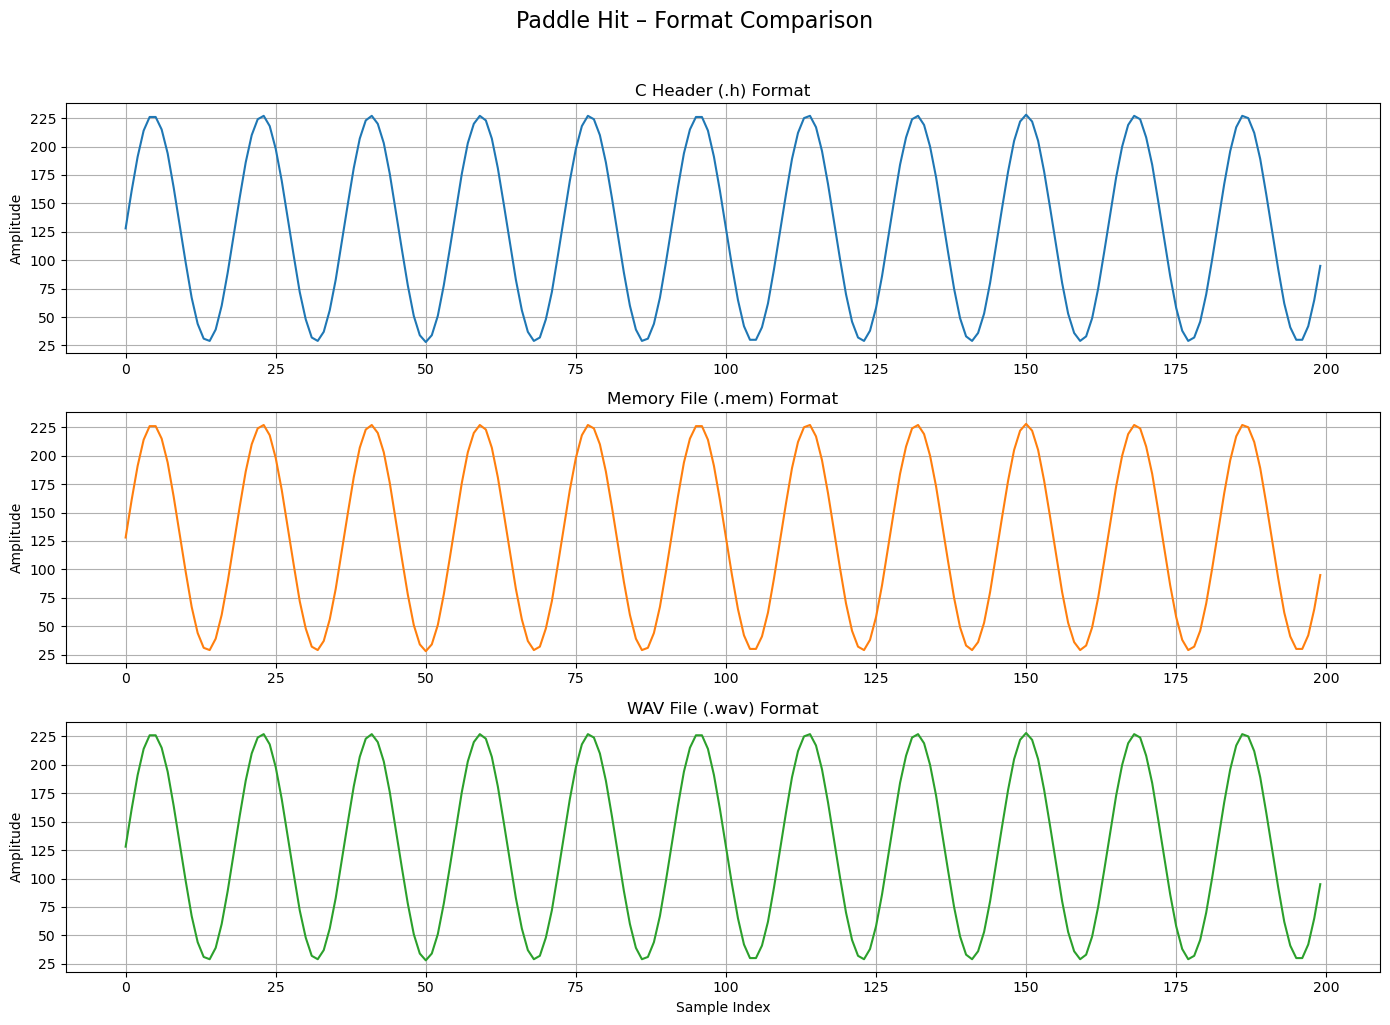

In [14]:
# Define your base path using a raw string (recommended)
base_path = r"C:\Users\alexj\Desktop\Grad_school\Spring_2025\EEL5934_soc_design\final_project\task_1\audio_verification_code\audio_verification_code"

# Join filenames to the base path
h_file   = os.path.join(base_path, "paddle_hit.h")
mem_file = os.path.join(base_path, "paddle_hit.mem")
wav_file = os.path.join(base_path, "paddle_hit.wav")

# Load all formats
header_data = load_header_file(h_file)
mem_data = load_mem_file(mem_file)
wav_data, wav_sr = load_wav_file(wav_file)

# Number of samples to display
num_samples = 200

# Set up subplots
plt.figure(figsize=(14, 10))

# Title for the full figure
plt.suptitle("Paddle Hit – Format Comparison", fontsize=16, y=1.02)

# Plot header (.h)
plt.subplot(3, 1, 1)
plt.plot(header_data[:num_samples], color='tab:blue')
plt.title("C Header (.h) Format")
plt.ylabel("Amplitude")
plt.grid(True)

# Plot memory (.mem)
plt.subplot(3, 1, 2)
plt.plot(mem_data[:num_samples], color='tab:orange')
plt.title("Memory File (.mem) Format")
plt.ylabel("Amplitude")
plt.grid(True)

# Plot wav
plt.subplot(3, 1, 3)
plt.plot(wav_data[:num_samples], color='tab:green')
plt.title("WAV File (.wav) Format")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()

## Audio verification for MARY LAMB sound

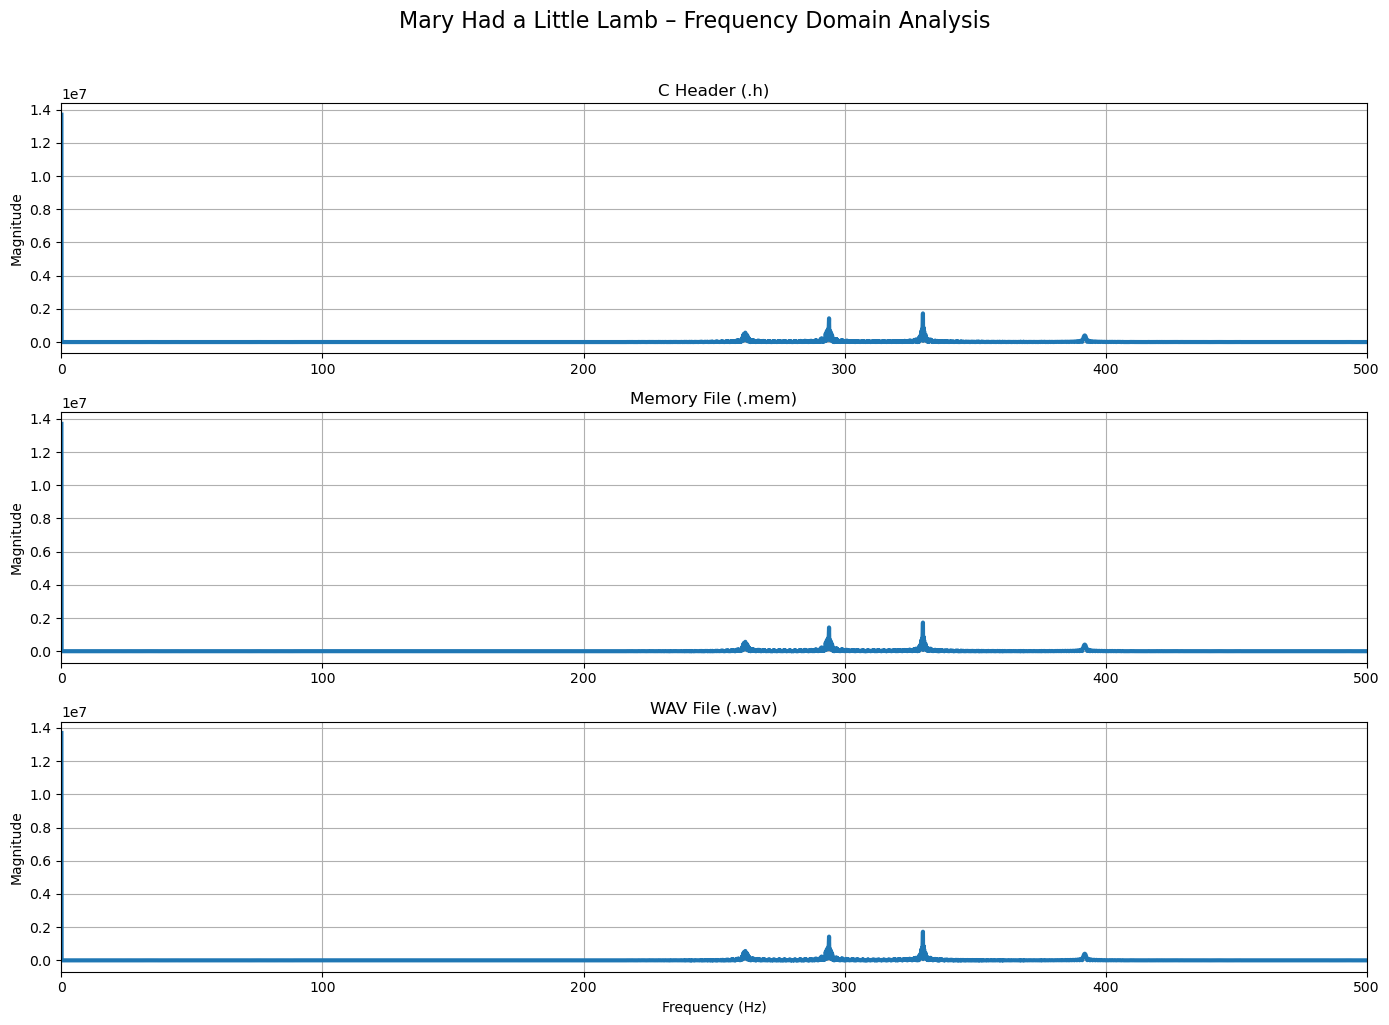

In [16]:
# Define your base path using a raw string (recommended)
base_path = r"C:\Users\alexj\Desktop\Grad_school\Spring_2025\EEL5934_soc_design\final_project\task_1\audio_verification_code\audio_verification_code"

# Join filenames to the base path
h_file   = os.path.join(base_path, "mary_lamb.h")
mem_file = os.path.join(base_path, "mary_lamb.mem")
wav_file = os.path.join(base_path, "mary_lamb.wav")

# Reload data
N_FFT = 120000
header_data = load_header_file(h_file)[:N_FFT]
mem_data = load_mem_file(mem_file)[:N_FFT]
wav_data, wav_sr = load_wav_file(wav_file)
wav_data = wav_data[:N_FFT]

# Plot separately
plt.figure(figsize=(14, 10))
plt.suptitle("Mary Had a Little Lamb – Frequency Domain Analysis", fontsize=16, y=1.02)

plot_fft_subplot(header_data, 8000, "C Header (.h)", 1, 3)
plot_fft_subplot(mem_data, 8000, "Memory File (.mem)", 2, 3)
plot_fft_subplot(wav_data, wav_sr, "WAV File (.wav)", 3, 3)

plt.tight_layout()
plt.show()

## Audio verification for POINT SCORED sound

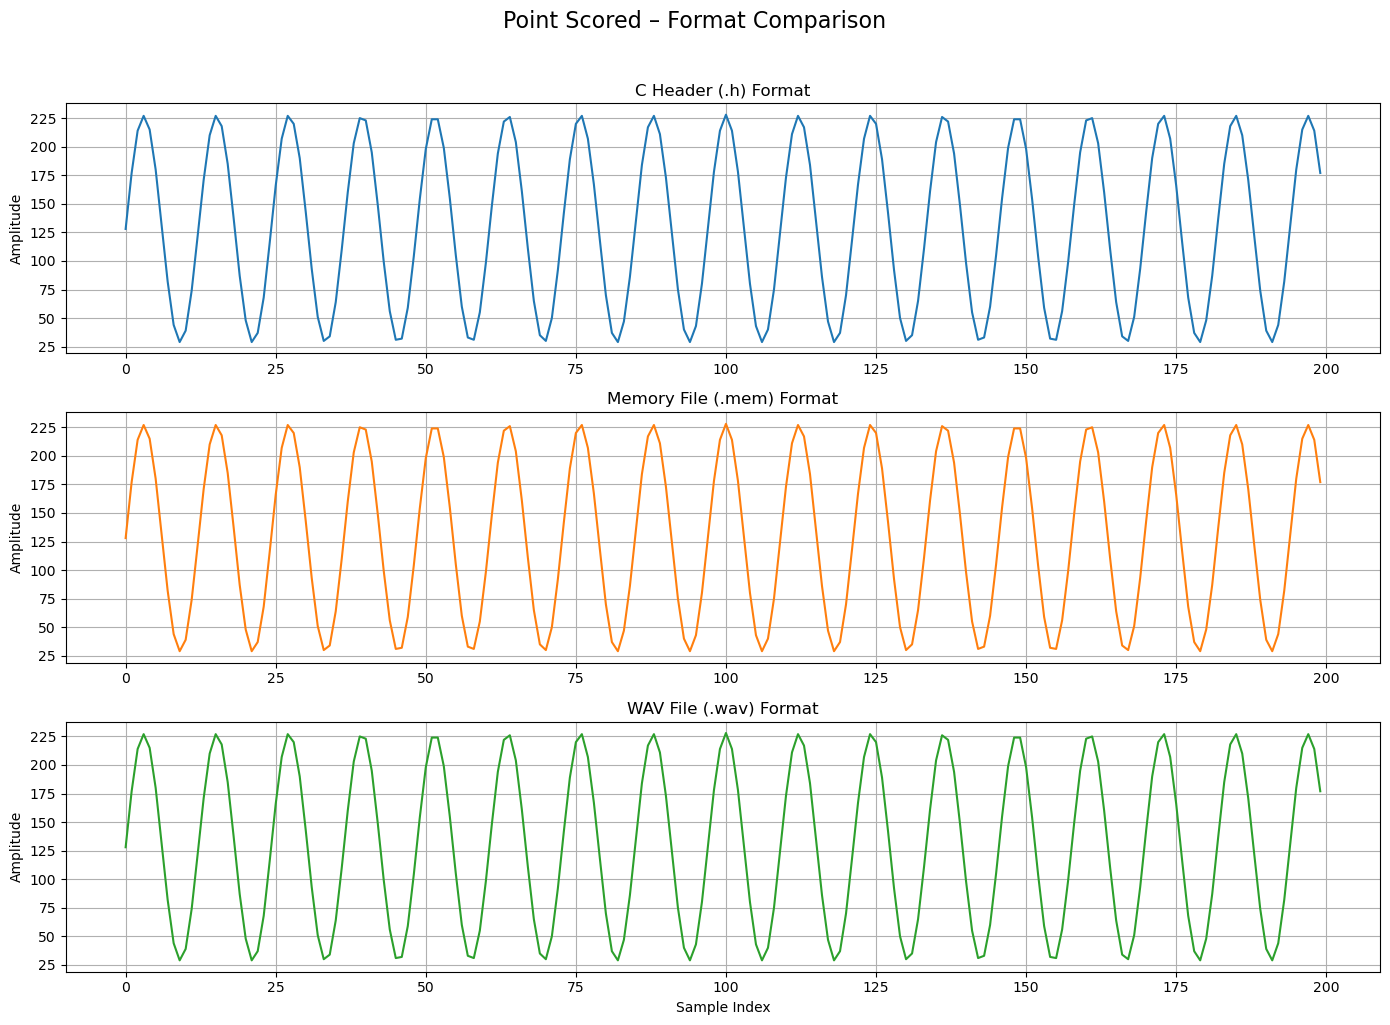

In [18]:
# Define your base path using a raw string (recommended)
base_path = r"C:\Users\alexj\Desktop\Grad_school\Spring_2025\EEL5934_soc_design\final_project\task_1\audio_verification_code\audio_verification_code"

# Join filenames to the base path
h_file   = os.path.join(base_path, "point_scored.h")
mem_file = os.path.join(base_path, "point_scored.mem")
wav_file = os.path.join(base_path, "point_scored.wav")

# Load all formats
header_data = load_header_file(h_file)
mem_data = load_mem_file(mem_file)
wav_data, wav_sr = load_wav_file(wav_file)

# Number of samples to display
num_samples = 200

# Set up subplots
plt.figure(figsize=(14, 10))

# Title for the full figure
plt.suptitle("Point Scored – Format Comparison", fontsize=16, y=1.02)

# Plot header (.h)
plt.subplot(3, 1, 1)
plt.plot(header_data[:num_samples], color='tab:blue')
plt.title("C Header (.h) Format")
plt.ylabel("Amplitude")
plt.grid(True)

# Plot memory (.mem)
plt.subplot(3, 1, 2)
plt.plot(mem_data[:num_samples], color='tab:orange')
plt.title("Memory File (.mem) Format")
plt.ylabel("Amplitude")
plt.grid(True)

# Plot wav
plt.subplot(3, 1, 3)
plt.plot(wav_data[:num_samples], color='tab:green')
plt.title("WAV File (.wav) Format")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()